## Discrete-time competitive Beverton-Holt model

\begin{align}
N_{1,t+1}=\dfrac{r_1N_{1,t}}{1+a_{11}N_{1,t}+a_{12}N_{2,t}} \\
N_{2,t+1}=\dfrac{r_2N_{2,t}}{1+a_{22}N_{2,t}+a_{21}N_{1,t}}
\tag{1}
\end{align}

## Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
#from SALib.sample.morris import sample as ee_sample
#from tqdm import tqdm

## Initialization

In [2]:
# Variables for the time series
tmax = 100
time = np.linspace(1,tmax,tmax)
y1 = np.zeros(tmax)
y2 = np.zeros(tmax)
y1[0], y2[0] = 5, 5 #0.4, 0.6 # initial conditions
final_abundance1=np.zeros(0)
final_growth_rate1=np.zeros(0)
final_abundance2=np.zeros(0)
final_growth_rate2=np.zeros(0)
cov=np.zeros(0)

growth_rate1 = np.zeros(tmax)
growth_rate2 = np.zeros(tmax)
positive_growth_rate1=np.zeros(0)
positive_growth_rate2=np.zeros(0)
negative_growth_rate1=np.zeros(0)
negative_growth_rate2=np.zeros(0)
zero_growth_rate1=np.zeros(0)
zero_growth_rate2=np.zeros(0)
positive_final_abundance1=np.zeros(0)
positive_final_abundance2=np.zeros(0)
negative_final_abundance1=np.zeros(0)
negative_final_abundance2=np.zeros(0)
zero_final_abundance1=np.zeros(0)
zero_final_abundance2=np.zeros(0)

# Variables for the per capita growth rate
ymax = 50
y1_SR = np.zeros(ymax)
y2_SR = np.zeros(ymax)
growth_rate1_SR = np.zeros(ymax)
growth_rate2_SR = np.zeros(ymax)

## Test for only one set of parameters

In [3]:
r1=20
r2=16
a11=2.7
a12=0.6
a21=0.6
a22=0.6

In [ ]:
N1 = np.zeros(tmax)
N2 = np.zeros(tmax)
NpNa1 = np.zeros(tmax)
NpNa2 = np.zeros(tmax)
Nd1 = np.zeros(tmax+1)
Nd2 = np.zeros(tmax+1)

for i in range(0,tmax):
    NpNa1[i] = r1 / ( 1 + a11 * N1[i] + a12 * N2[i] )
    NpNa2[i] = r2 / ( 1 + a22 * N2[i] + a21 * N1[i] )
    Nd1[i+1] = N1[i] * NpNa1[i]
    Nd2[i+1] = N2[i] * NpNa2[i]

fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
ax1.plot(N1[0:-1], NpNa1[0:-1], alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="r")
ax1.set(xlabel='$N_{1,t}$', ylabel='$\log(N_{1,t+1}/N_{1,t})$')
ax2.plot(N2[0:-1], NpNa2[0:-1], alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="b")
ax2.set(xlabel='$N_{2,t}$', ylabel='$\log(N_{2,t+1}/N_{2,t})$')
plt.rcParams.update({'font.size': 30})
plt.tight_layout()
plt.show()

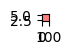

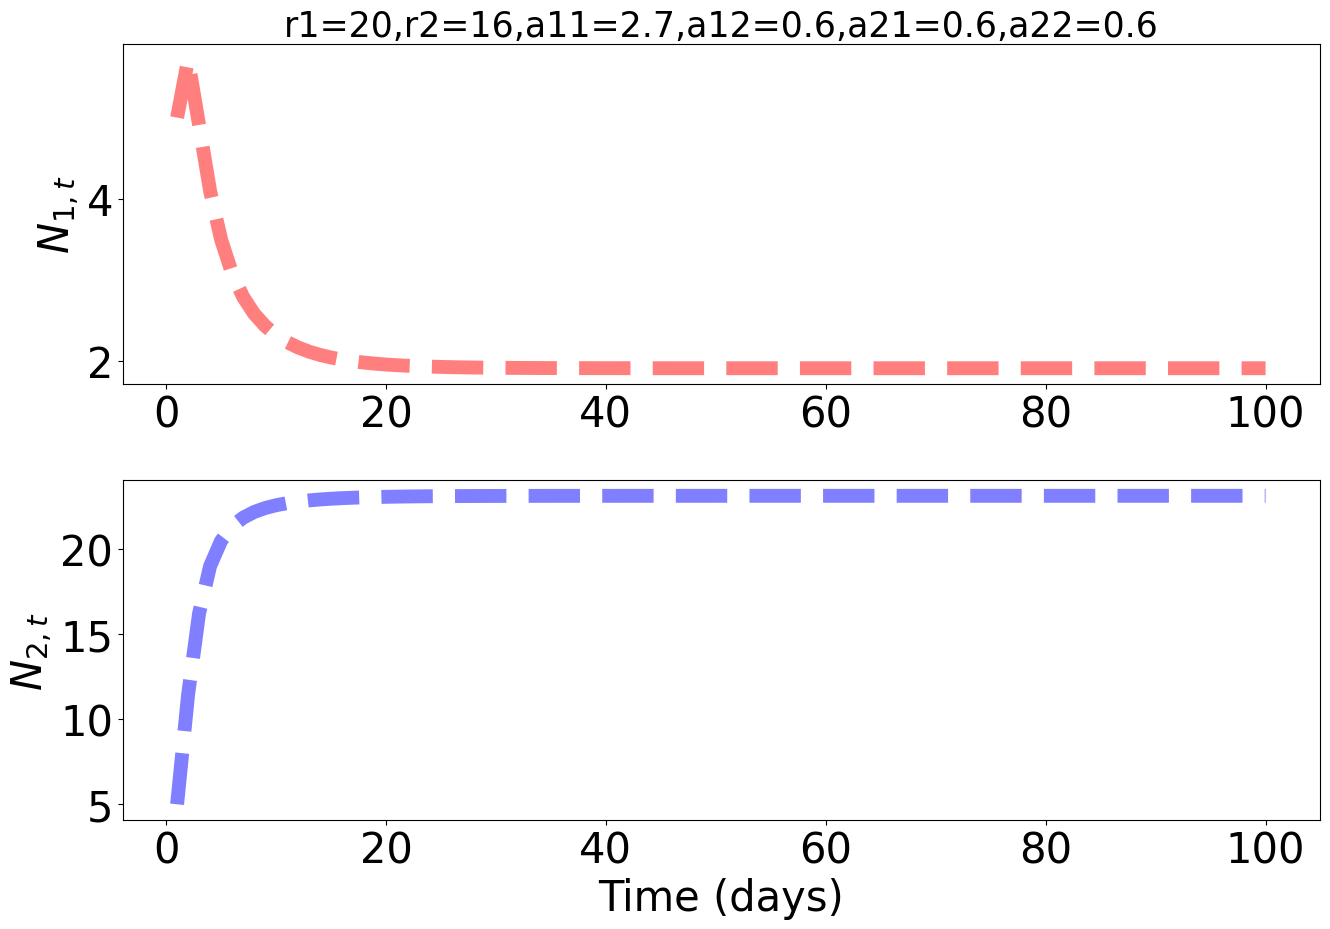

In [4]:
## Strength of stabilization
S1=r2/(1+(a12/a22)*(r2-1))
S2=r1/(1+(a21/a11)*(r1-1))                     
## Discrete-time competitive Beverton-Holt model
for i in range(tmax-1):
    growth_rate1[i] = r1 / ( 1 + a11 * y1[i] + a12 * y2[i] )
    growth_rate2[i] = r2 / ( 1 + a22 * y2[i] + a21 * y1[i] )
    y1[i+1] = y1[i] * growth_rate1[i]
    y2[i+1] = y2[i] * growth_rate2[i]

# Dummy plot
fig, ax = plt.subplots(figsize=(0.1, 0.1))
ax.plot(time, y1, alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="r")
plt.rcParams.update({'font.size': 30})

fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
ax1.plot(time, y1, alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="r", label='S1='+str(S1))
ax1.set(ylabel='$N_{1,t}$')
ax2.plot(time, y2, alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="b", label='S2='+str(S2))
ax2.set(xlabel='Time (days)', ylabel='$N_{2,t}$')
plt.rcParams.update({'font.size': 30})
ax1.set_title('r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
#plt.savefig('img/time_series1_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

## Covariance: strength of stabilization and final population

In [5]:
for r1 in range(15,21,2):
    for r2 in range(11,21,2):
        for a11 in np.arange(0.7,3.1,0.2):
            for a12 in np.arange(0.1,1.1,0.2):
                for a21 in np.arange(0.1,1.1,0.2):
                    for a22 in np.arange(0.1,1.1,0.2):
                        ## Strength of stabilization
                        S1=r2/(1+(a12/a22)*(r2-1))
                        S2=r1/(1+(a21/a11)*(r1-1))                     
                        ## Discrete-time competitive Beverton-Holt model
                        for i in range(tmax-1):
                            growth_rate1[i] = r1 / ( 1 + a11 * y1[i] + a12 * y2[i] )
                            growth_rate2[i] = r2 / ( 1 + a22 * y2[i] + a21 * y1[i] )
                            y1[i+1] = y1[i] * growth_rate1[i]
                            y2[i+1] = y2[i] * growth_rate2[i]
#                        print("per capita: " + str(growth_rate1[-2]) )#+ "\t" + "time: " + str(i))
                        S=np.array([S1,S2])
                        abundance=np.array([y1[-1],y2[-1]])
                        cov=np.append(cov,np.cov(abundance, S)[0][1])
                        final_abundance1=np.append(final_abundance1,y1[-1])
                        final_abundance2=np.append(final_abundance2,y2[-1])
                        final_growth_rate1=np.append(final_growth_rate1,growth_rate1[-2])
                        final_growth_rate2=np.append(final_growth_rate2,growth_rate2[-2])

In [28]:
final_growth_rate1[-1]

0.989745705252217

In [6]:
for i in range(len(cov)):
    if np.absolute(cov[i])<1e-5:
        cov[i]=0.0

print("covariance: \n",cov)
cov.shape

covariance: 
 [173.33333333  14.76923077  -0.78431373 ...  44.69312153  29.11925858
  20.33459259]


(24375,)

In [7]:
for i in range(len(cov)):
    if cov[i]>0:
        positive_growth_rate1=np.append(positive_growth_rate1,final_growth_rate1[i])
        positive_growth_rate2=np.append(positive_growth_rate2,final_growth_rate2[i])
        positive_final_abundance1=np.append(positive_final_abundance1,final_abundance1[i])
        positive_final_abundance2=np.append(positive_final_abundance2,final_abundance2[i])
    elif cov[i]<0:
        negative_growth_rate1=np.append(negative_growth_rate1,final_growth_rate1[i])
        negative_growth_rate2=np.append(negative_growth_rate2,final_growth_rate2[i])
        negative_final_abundance1=np.append(negative_final_abundance1,final_abundance1[i])
        negative_final_abundance2=np.append(negative_final_abundance2,final_abundance2[i])
    else:
        zero_growth_rate1=np.append(zero_growth_rate1,final_growth_rate1[i])
        zero_growth_rate2=np.append(zero_growth_rate2,final_growth_rate2[i])
        zero_final_abundance1=np.append(zero_final_abundance1,final_abundance1[i])
        zero_final_abundance2=np.append(zero_final_abundance2,final_abundance2[i])

## Time series

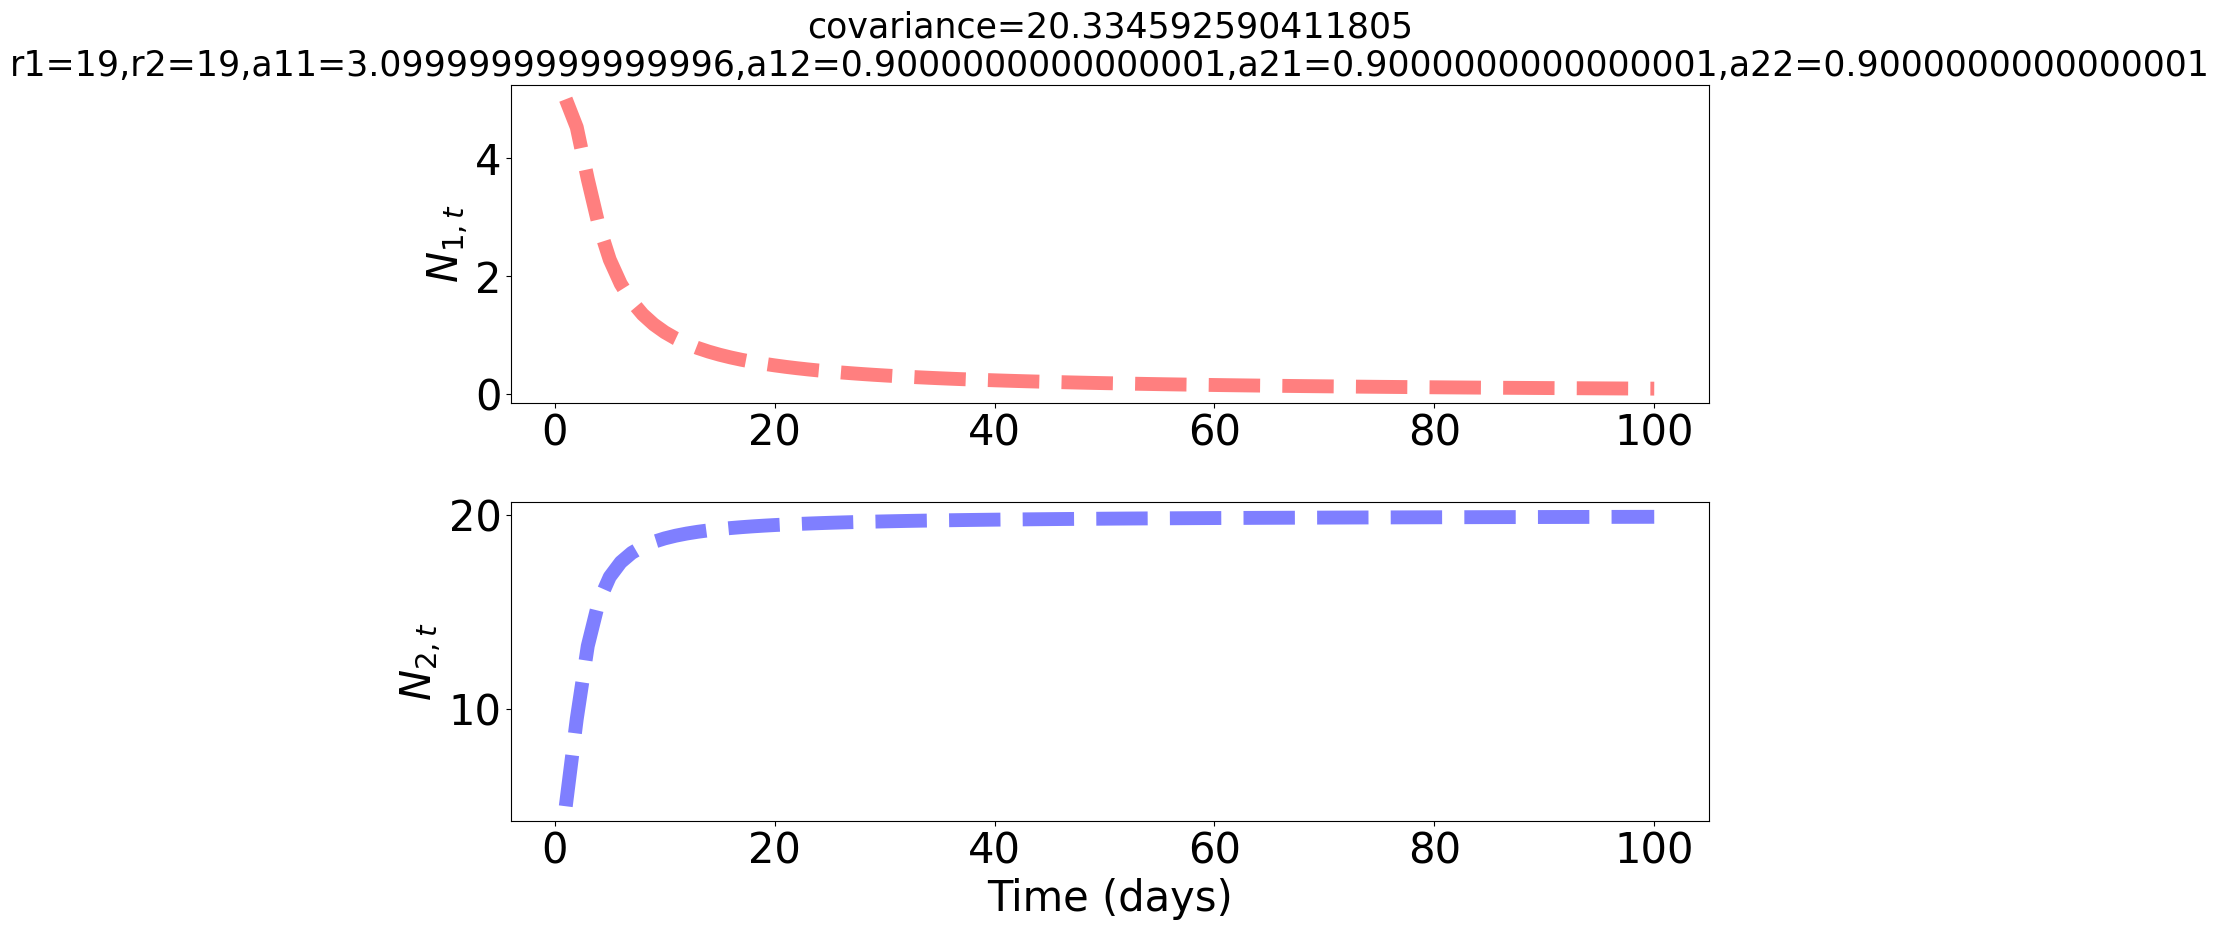

In [8]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
ax1.plot(time, y1, alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="r", label='S1='+str(S1))
ax1.set(ylabel='$N_{1,t}$')
ax2.plot(time, y2, alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="b", label='S2='+str(S2))
ax2.set(xlabel='Time (days)', ylabel='$N_{2,t}$')
plt.rcParams.update({'font.size': 30})
ax1.set_title('covariance='+str(np.cov(abundance, S)[0][1])+'\n'+'r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
plt.savefig('img/time_series_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

## Yenni's graph

In [9]:
for i in range(len(final_growth_rate1)):
    if np.absolute(final_growth_rate1[i])<1e-5:
        final_growth_rate1[i]=0.0

np.log(final_growth_rate1)

array([-2.47135645e-13,  0.00000000e+00,  0.00000000e+00, ...,
       -5.64116921e-01, -2.39549587e-01, -1.03072322e-02])

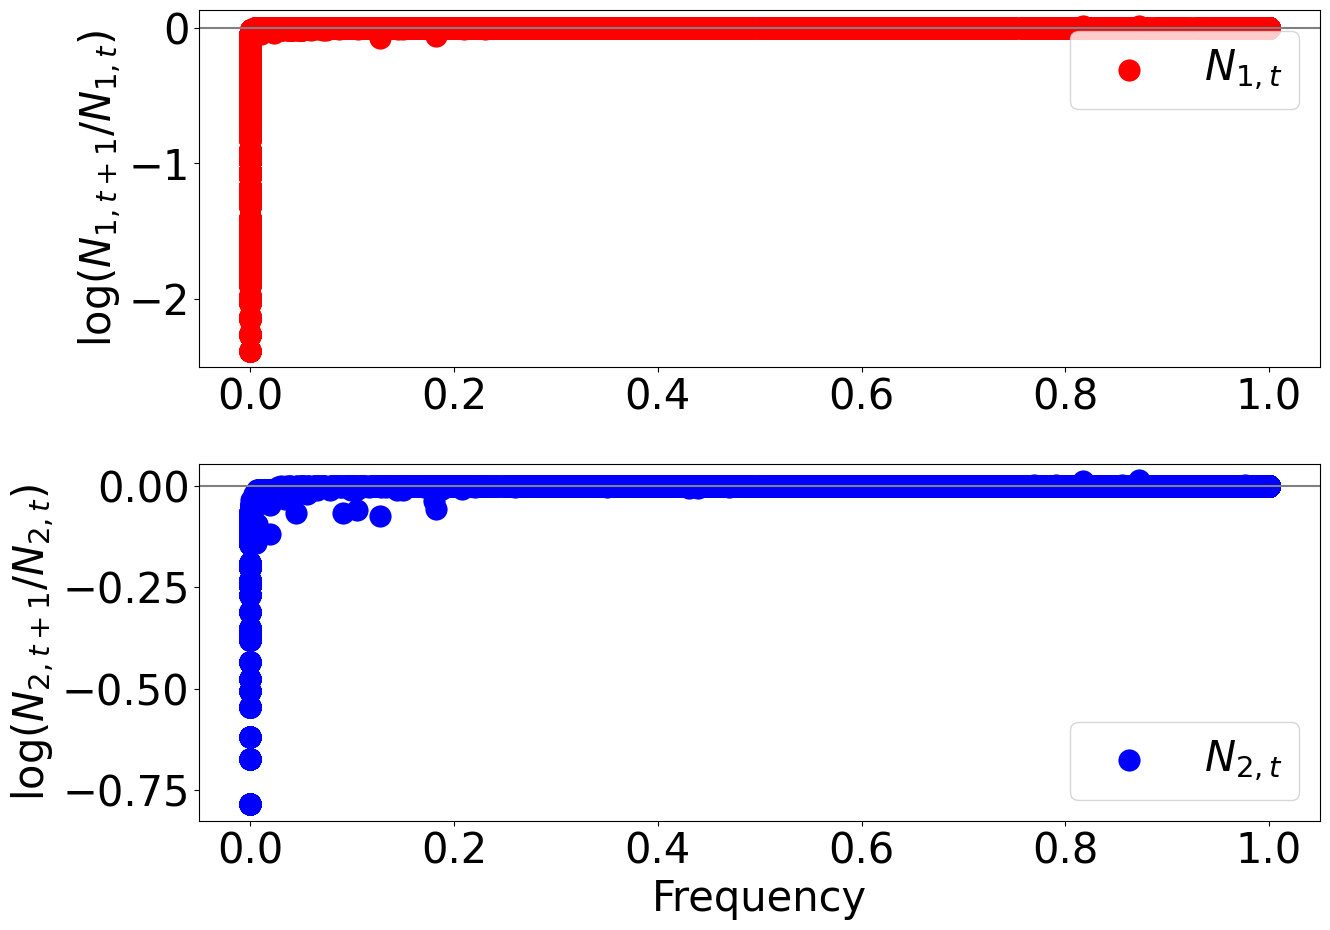

In [10]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
ax1.scatter(final_abundance1/(final_abundance1+final_abundance2), np.log(final_growth_rate1), linewidth=10, color="r", label='$N_{1,t}$' )#, alpha=0.5,linestyle="-", linewidth=10, markersize=12, color="r", label='$N_{1,t}$')
ax1.axhline(y=0, color='grey', linestyle='-')
ax1.set(ylabel='$\log(N_{1,t+1}/N_{1,t})$')
ax2.scatter(final_abundance2/(final_abundance1+final_abundance2), np.log(final_growth_rate2), linewidth=10, color="b", label='$N_{2,t}$' )#, alpha=0.5,linestyle="-", linewidth=10, markersize=12, color="b", label='$N_{2,t}$')
ax2.axhline(y=0, color='grey', linestyle='-')
ax2.set(xlabel='Frequency', ylabel='$\log(N_{2,t+1}/N_{2,t})$')
plt.rcParams.update({'font.size': 30})
ax1.legend()
ax2.legend()
#ax1.set_title('covariance='+str(np.cov(abundance, S)[0][1])+'\n'+'r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
plt.savefig('img/frequency_dependence_covariance_'+str(np.cov(abundance, S)[0][1])+'_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

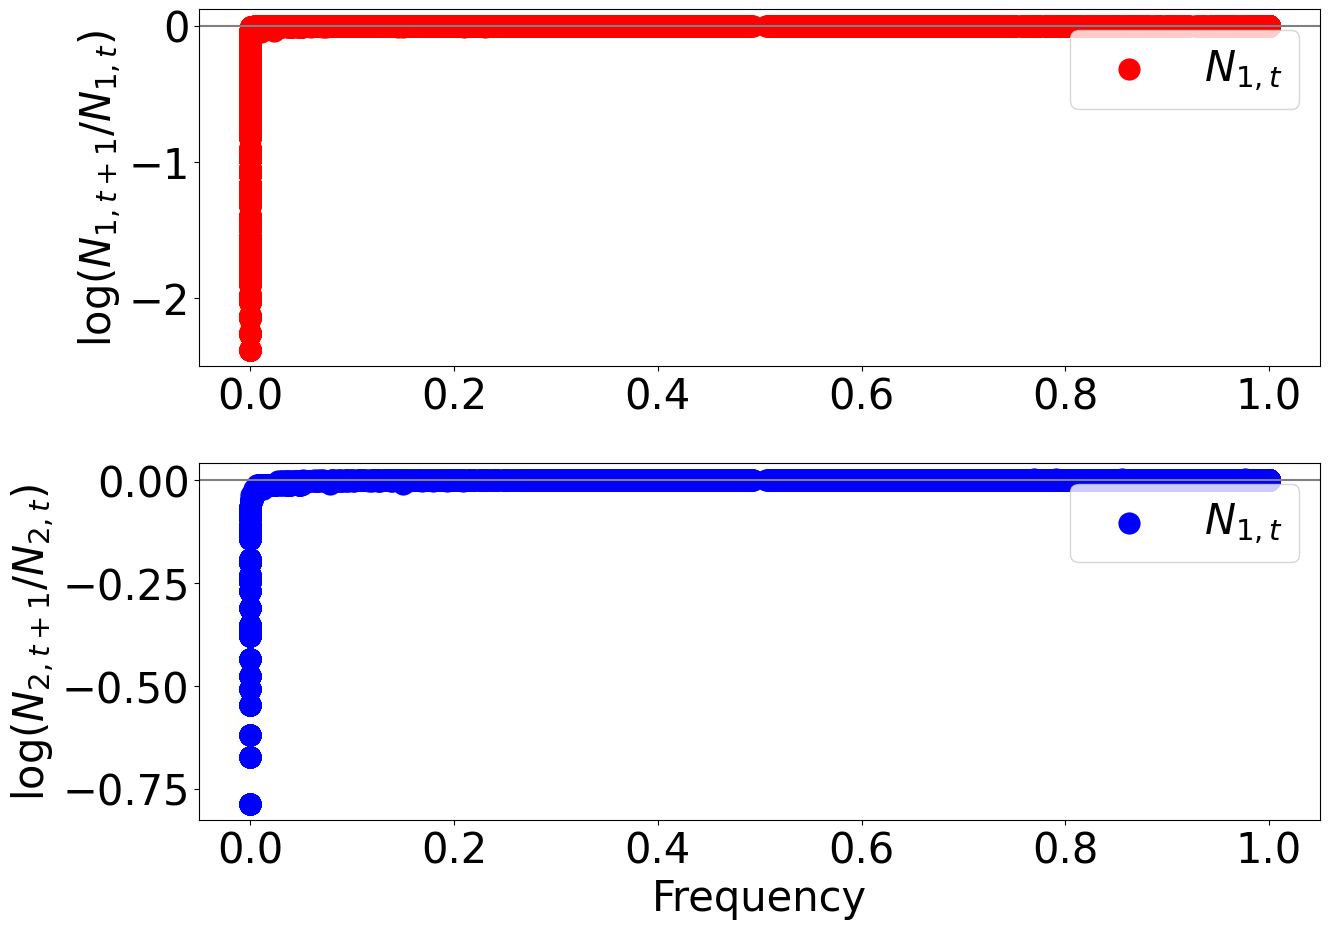

In [11]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
ax1.scatter(positive_final_abundance1/(positive_final_abundance1+positive_final_abundance2), np.log(positive_growth_rate1), linewidth=10, color="r", label='$N_{1,t}$' )#, alpha=0.5,linestyle="-", linewidth=10, markersize=12, color="r", label='$N_{1,t}$')
ax1.axhline(y=0, color='grey', linestyle='-')
ax1.set(ylabel='$\log(N_{1,t+1}/N_{1,t})$')
ax2.scatter(positive_final_abundance2/(positive_final_abundance1+positive_final_abundance2), np.log(positive_growth_rate2), linewidth=10, color="b", label='$N_{1,t}$' )#, alpha=0.5,linestyle="-", linewidth=10, markersize=12, color="b", label='$N_{2,t}$')
ax2.axhline(y=0, color='grey', linestyle='-')
ax2.set(xlabel='Frequency', ylabel='$\log(N_{2,t+1}/N_{2,t})$')
plt.rcParams.update({'font.size': 30})
ax1.legend()
ax2.legend()
#ax1.set_title('covariance='+str(np.cov(abundance, S)[0][1])+'\n'+'r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
plt.savefig('img/frequency_dependence_covariance_'+str(np.cov(abundance, S)[0][1])+'_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

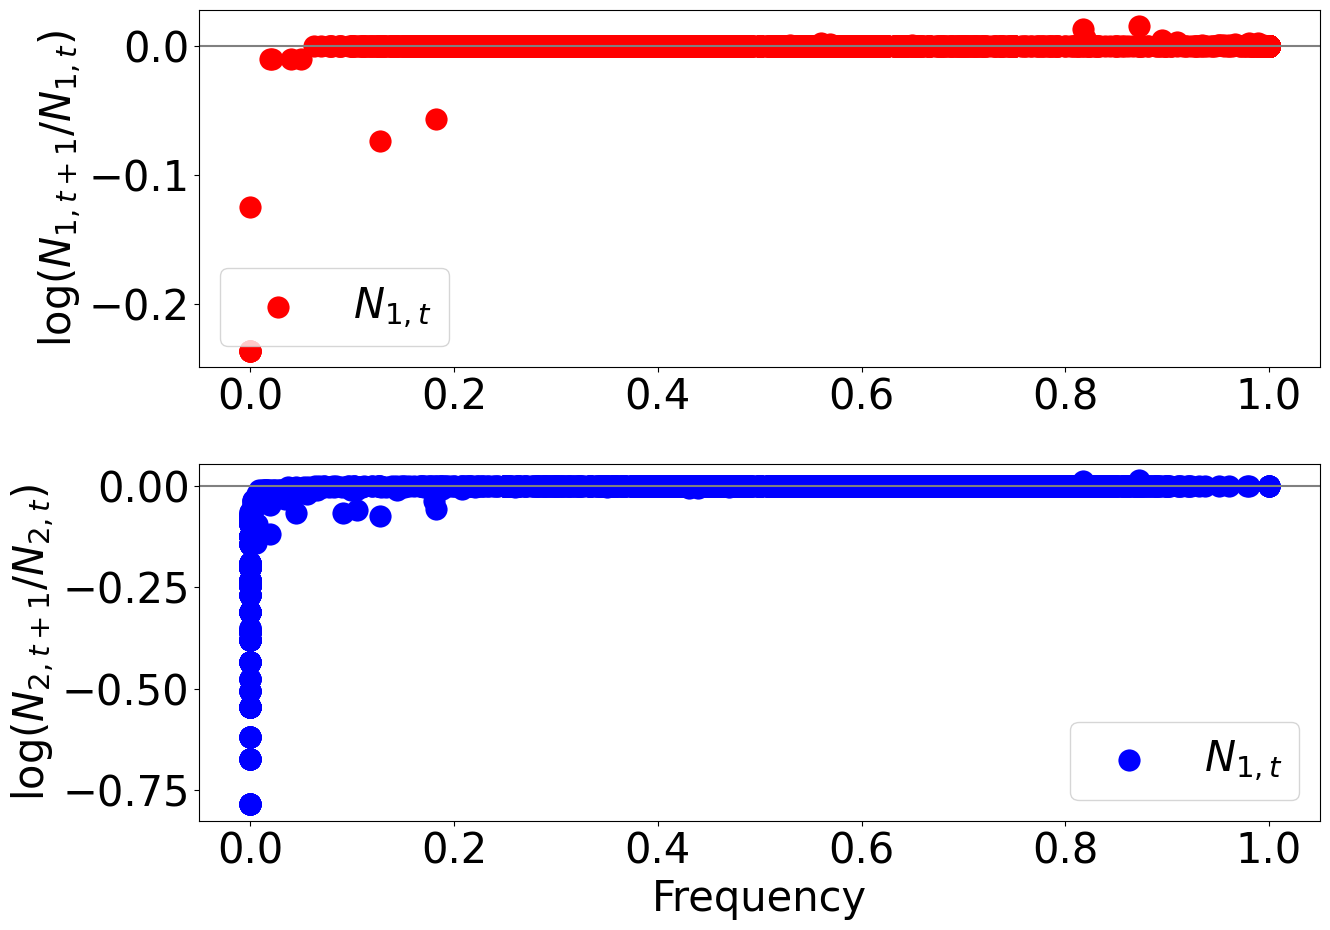

In [12]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
ax1.scatter(negative_final_abundance1/(negative_final_abundance1+negative_final_abundance2), np.log(negative_growth_rate1), linewidth=10, color="r", label='$N_{1,t}$' )#, alpha=0.5,linestyle="-", linewidth=10, markersize=12, color="r", label='$N_{1,t}$')
ax1.axhline(y=0, color='grey', linestyle='-')
ax1.set(ylabel='$\log(N_{1,t+1}/N_{1,t})$')
ax2.scatter(negative_final_abundance2/(negative_final_abundance1+negative_final_abundance2), np.log(negative_growth_rate2), linewidth=10, color="b", label='$N_{1,t}$' )#, alpha=0.5,linestyle="-", linewidth=10, markersize=12, color="b", label='$N_{2,t}$')
ax2.axhline(y=0, color='grey', linestyle='-')
ax2.set(xlabel='Frequency', ylabel='$\log(N_{2,t+1}/N_{2,t})$')
plt.rcParams.update({'font.size': 30})
ax1.legend()
ax2.legend()
#ax1.set_title('covariance='+str(np.cov(abundance, S)[0][1])+'\n'+'r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
plt.savefig('img/frequency_dependence_covariance_'+str(np.cov(abundance, S)[0][1])+'_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

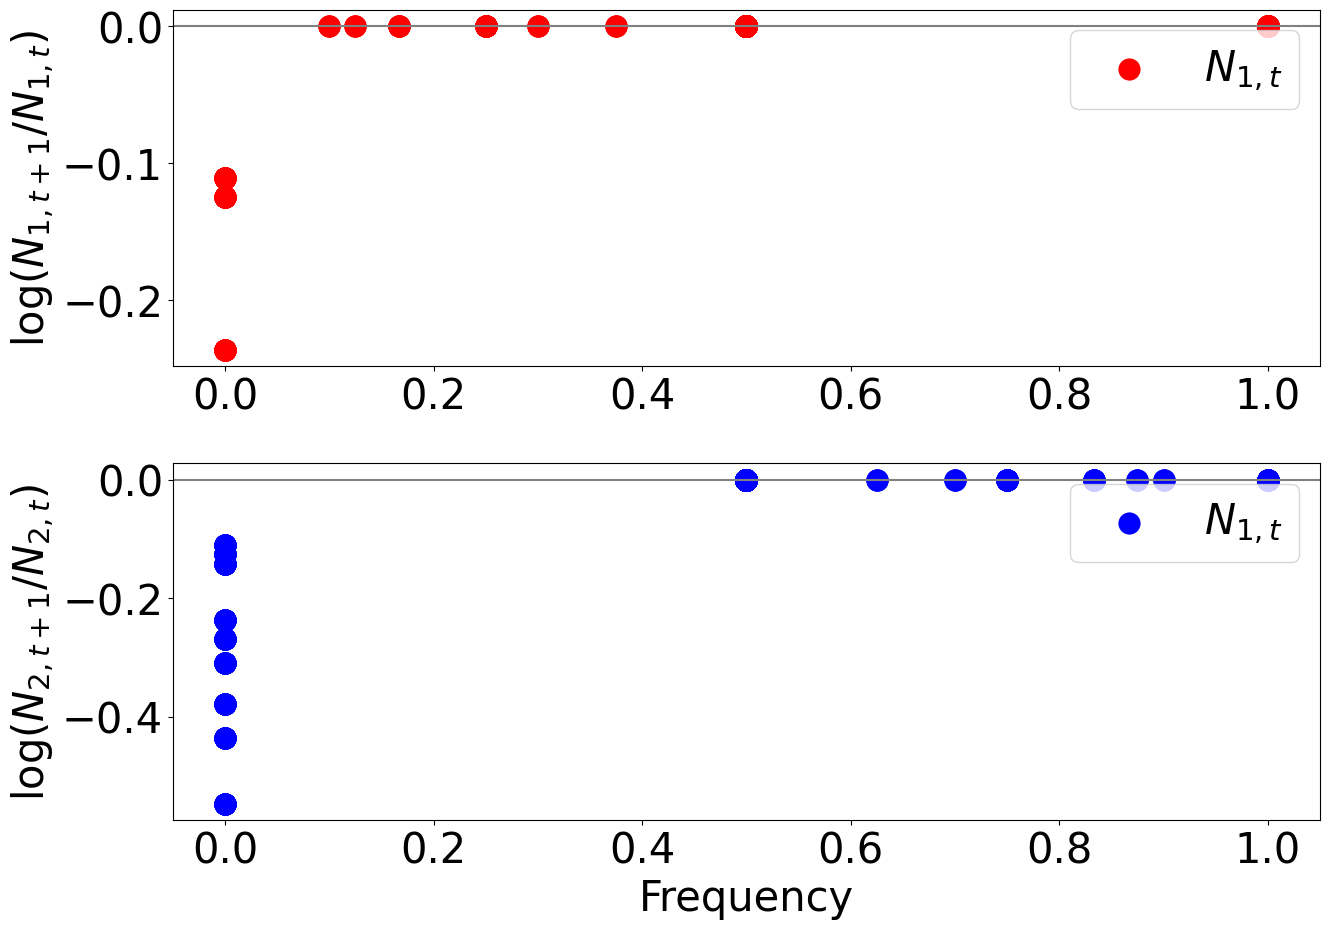

In [13]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
ax1.scatter(zero_final_abundance1/(zero_final_abundance1+zero_final_abundance2), np.log(zero_growth_rate1), linewidth=10, color="r", label='$N_{1,t}$' )#, alpha=0.5,linestyle="-", linewidth=10, markersize=12, color="r", label='$N_{1,t}$')
ax1.axhline(y=0, color='grey', linestyle='-')
ax1.set(ylabel='$\log(N_{1,t+1}/N_{1,t})$')
ax2.scatter(zero_final_abundance2/(zero_final_abundance1+zero_final_abundance2), np.log(zero_growth_rate2), linewidth=10, color="b", label='$N_{1,t}$' )#, alpha=0.5,linestyle="-", linewidth=10, markersize=12, color="b", label='$N_{2,t}$')
ax2.axhline(y=0, color='grey', linestyle='-')
ax2.set(xlabel='Frequency', ylabel='$\log(N_{2,t+1}/N_{2,t})$')
plt.rcParams.update({'font.size': 30})
ax1.legend()
ax2.legend()
#ax1.set_title('covariance='+str(np.cov(abundance, S)[0][1])+'\n'+'r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
plt.savefig('img/frequency_dependence_covariance_'+str(np.cov(abundance, S)[0][1])+'_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

In [14]:
for i in range(0,tmax):
    print( str(positive_final_abundance1[i]) + "\t" + str(np.log(positive_growth_rate1[i])) )

6.666666666671655	-2.471356452815904e-13
16.000000000000004	0.0
18.70967741935484	0.0
10.00000002141882	-4.855844616471387e-10
17.77777777777778	0.0
18.75	0.0
19.130434782608695	0.0
19.333333333333332	-1.1102230246251565e-16
19.930808062154192	3.517392903711509e-05
19.96276502465339	1.9100539566944327e-05
19.97453645106448	1.3101572626830175e-05
19.980654660631433	9.968245077178547e-06
19.999999999999904	1.9984014443252798e-15
19.999999999999932	1.110223024625156e-15
19.99999999999995	8.881784197001248e-16
19.99999999999996	6.661338147750937e-16
20.0	0.0
20.0	0.0
20.0	0.0
20.0	0.0
20.0	0.0
3.3671915570531424e-30	-0.7259370033829363
6.666666666670088	-1.6953105586027577e-13
12.500000000000002	0.0
1.6216624184319072e-29	-0.7259370033829363
10.000000009024337	-2.0459001161971053e-10
17.77777777777778	0.0
5.582753719065823e-28	-0.7259370033829363
19.830477884268678	8.79965568630514e-05
19.900137210828525	5.19110770933699e-05
19.929265842687887	3.676771781794716e-05
19.999999999999694	5.551

## Finite Growth Rate and Stock Recruitment Curve

In [15]:
## Discrete-time competitive Beverton-Holt model
for i in range(ymax):
    growth_rate1_SR[i] = r1 / ( 1 + a11 * y1_SR[i] + a12 * y2_SR[i] )
    growth_rate2_SR[i] = r2 / ( 1 + a22 * y2_SR[i] + a21 * y1_SR[i] )
    y1_SR[i] = y1_SR[i] * growth_rate1_SR[i]
    y2_SR[i] = y2_SR[i] * growth_rate2_SR[i]

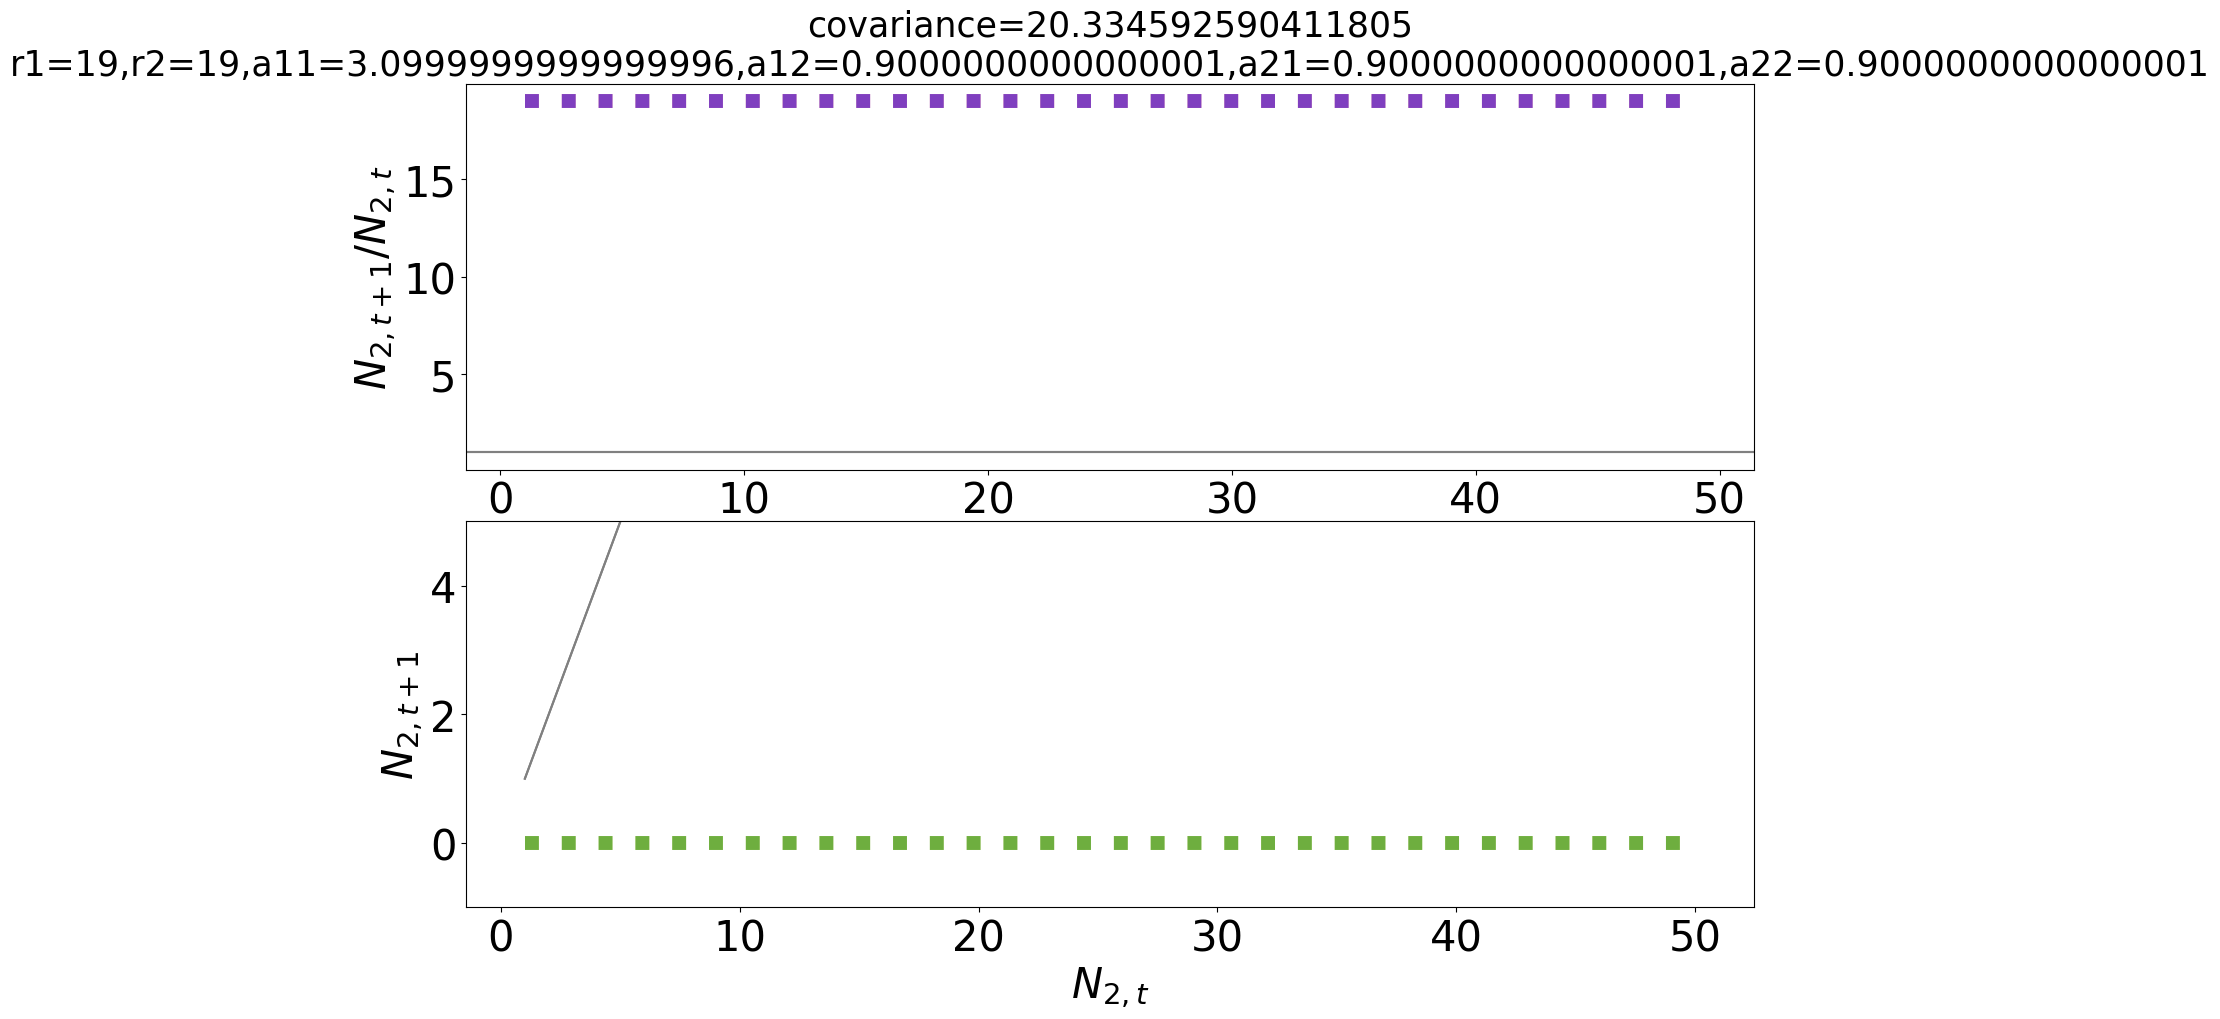

In [16]:
N = np.linspace(1,ymax,ymax)
fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
# Finite Growth Rate
ax1.plot(N[0:-1], growth_rate1_SR[0:-1], alpha=0.5,linestyle="dotted", linewidth=10, markersize=12, color="r")
ax1.axhline(y=1, color='grey', linestyle='-')
ax1.set(ylabel='$N_{1,t+1}/N_{1,t}$')
# Stock-Recruitment
ax2.plot(N, y1_SR, alpha=0.5,linestyle="dotted", linewidth=10, markersize=12, color="y")
ax2.plot(N,N, color="grey") # add a straight line
ax2.set_ylim([-1, 5])
ax2.set(xlabel='$N_{1,t}$', ylabel='$N_{1,t+1}$')
# Finite Growth Rate
ax1.plot(N[0:-1], growth_rate2_SR[0:-1], alpha=0.5,linestyle="dotted", linewidth=10, markersize=12, color="b")
ax1.axhline(y=1, color='grey', linestyle='-')
ax1.set(ylabel='$N_{2,t+1}/N_{2,t}$')
# Stock-Recruitment
ax2.plot(N, y2_SR, alpha=0.5,linestyle="dotted", linewidth=10, markersize=12, color="g")
ax2.plot(N,N, color="grey") # add a straight line
ax2.set_ylim([-1, 5])
ax2.set(xlabel='$N_{2,t}$', ylabel='$N_{2,t+1}$')
plt.rcParams.update({'font.size': 30})
ax1.set_title('covariance='+str(np.cov(abundance, S)[0][1])+'\n'+'r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout(pad=0)
plt.savefig('img/finite_growth_rate_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50, bbox_inches='tight')
plt.show()